In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('Car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [4]:
print(df.Seller_Type.unique())
print(df.Fuel_Type.unique())
print(df.Transmission.unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# converting number of years 

In [6]:
df['n.o of years']=2020-df['Year']

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,n.o of years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [8]:
df.drop(['Year','Car_Name'],axis=1,inplace=True)

In [9]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,n.o of years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [10]:
df=pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n.o of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


# finding corelation

In [12]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,n.o of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
n.o of years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


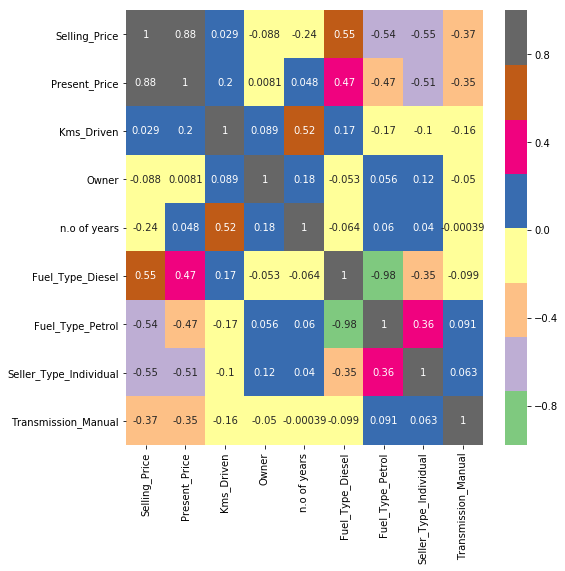

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Accent')


- where present price and selling price has high corelation

In [42]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [43]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [44]:
## Feature importance
from sklearn.ensemble import ExtraTreesRegressor

In [45]:
model=ExtraTreesRegressor()
model.fit(x,y)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [46]:
print(model.feature_importances_)

[0.17810602 0.00433925 0.13317859 0.30692114 0.00068642 0.15550542
 0.22126316]


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((240, 7), (240,), (61, 7), (61,))

In [48]:
model1=LinearRegression()

In [49]:
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred=model1.predict(x_test)

In [51]:
model1.score(x_test,y_pred)

1.0

In [52]:
from sklearn import metrics

In [53]:
metrics.mean_absolute_error(y_test,y_pred)

2.036594143616702

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


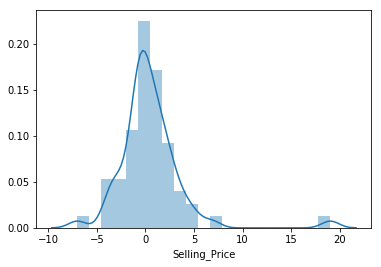

In [41]:
sns.distplot(y_test-y_pred)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [55]:
regressor=RandomForestRegressor()

In [57]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_sample_split=[2,5,10,15,20,100]
min_sample_leaf=[1,2,5,10]

In [62]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_sample_split,
                           'min_samples_leaf':min_sample_leaf}

In [63]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [64]:
random_grid=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,random_state=41,verbose=2)

In [65]:
random_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   7.5s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   7.1s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   7.6s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   7.7s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   8.2s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=  11.5s
[CV] n_estimators=800, min_samples

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  12.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=   4.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  14.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  15.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  14.8s
[CV] n_estimators=100, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [67]:
random_grid.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [70]:
y_pred1=random_grid.predict(x_test)

In [72]:
metrics.mean_absolute_error(y_test,y_pred1)

1.5020442822680584

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


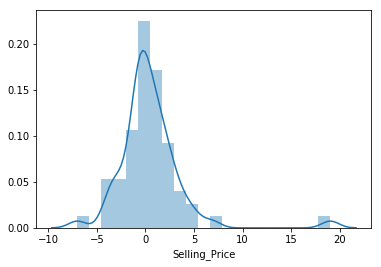

In [73]:
sns.distplot(y_test-y_pred)

In [75]:
import pickle
file=open('random_forest_regression-model.pkl','wb')
pickle.dump(random_grid,file)